In [19]:
import pandas as pd
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, pipeline
import matplotlib.pyplot as plt
import torch.optim as optim
from src.data_utils import clean_string, NextTokenDataset, RougeEvaluationDataset
from src.lstm_model import LSTMForNextTokenPrediction
from src.lstm_train import train_model_simple, plot_training_history
from src.eval_transformer_pipeline import calculate_rouge_transformer
from src.eval_lstm import calculate_rouge_simple

# load & preprocess

In [2]:
with open('./data/raw_dataset.csv', 'r', encoding='utf-8') as f:
    data = pd.DataFrame([line.rstrip('\n') for line in f], columns=['text'])

In [3]:
data['text'] = data['text'].apply(clean_string)
data = data.drop_duplicates('text')

# create dataset

In [4]:
val_size, seq_len = 0.2, 7
train_texts, val_texts = train_test_split(data['text'].iloc[:], test_size=val_size, random_state=42)
val_texts, test_texts = train_test_split(val_texts, test_size=0.5, random_state=42)

print(f"Train texts: {len(train_texts)}, Val texts: {len(val_texts)}")


Train texts: 1254601, Val texts: 156825


In [5]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
train_dataset = NextTokenDataset(train_texts, tokenizer, seq_len)
val_dataset = NextTokenDataset(val_texts, tokenizer, seq_len)
rouge_dataset = RougeEvaluationDataset(val_texts[:100], tokenizer)  # Только 100 для оценки

Preprocessing dataset: 100%|██████████| 156825/156825 [00:12<00:00, 12725.04it/s]


In [6]:
train_loader = DataLoader(train_dataset, batch_size=5992, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=5992)
rouge_loader = DataLoader(rouge_dataset, batch_size=1, shuffle=False)


# lstm train

In [7]:
train_dataset.__vocab_size__()

30522

In [8]:
vocab_size = train_dataset.__vocab_size__()

In [9]:
model = LSTMForNextTokenPrediction(vocab_size,
                                    embedding_dim=128,
                                    hidden_dim=128,
                                    n_layers=2)

trained_model, train_losses, rouge_history = train_model_simple(
    model=model,
    train_loader=train_loader,
    rouge_loader=rouge_loader,
    tokenizer=tokenizer,
    epochs=7,
    learning_rate=0.005
)

Using device: cuda


Epoch 1/7 [Train]: 100%|██████████| 2515/2515 [05:45<00:00,  7.28it/s, Loss=5.3246]



Epoch 1 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nukin
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 1/7 Результаты:
  Train Loss: 6.2467
  ROUGE1: 0.0586
  ROUGE2: 0.0000
  ROUGEL: 0.0535
  ROUGELSUM: 0.05

Epoch 2/7 [Train]: 100%|██████████| 2515/2515 [05:47<00:00,  7.24it/s, Loss=5.2648]



Epoch 2 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nuke
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 2/7 Результаты:
  Train Loss: 5.2612
  ROUGE1: 0.0694
  ROUGE2: 0.0000
  ROUGEL: 0.0623
  ROUGELSUM: 0.062

Epoch 3/7 [Train]: 100%|██████████| 2515/2515 [05:51<00:00,  7.16it/s, Loss=5.1016]



Epoch 3 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nugging
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 3/7 Результаты:
  Train Loss: 5.1211
  ROUGE1: 0.0689
  ROUGE2: 0.0000
  ROUGEL: 0.0637
  ROUGELSUM: 0.

Epoch 4/7 [Train]: 100%|██████████| 2515/2515 [05:47<00:00,  7.23it/s, Loss=5.0085]



Epoch 4 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs the new moon trailer
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nuggggddddddd
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 4/7 Результаты:
  Train Loss: 5.0498
  ROUGE1: 0.0659
  ROUGE2: 0.0000
  ROU

Epoch 5/7 [Train]: 100%|██████████| 2515/2515 [05:48<00:00,  7.23it/s, Loss=5.0291]



Epoch 5 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nugs im glad i have yet to get ready to make a night
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 5/7 Результаты:
  Train Loss: 5.0040
  ROUGE1: 0.0622
  RO

Epoch 6/7 [Train]: 100%|██████████| 2515/2515 [06:05<00:00,  6.89it/s, Loss=4.9767]



Epoch 6 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by barys with the big friends
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs too but i have to go to work now
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nuggay
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 6/7 Результаты:
  Train Loss: 4.9717
  ROUGE1: 0

Epoch 7/7 [Train]: 100%|██████████| 2515/2515 [05:50<00:00,  7.18it/s, Loss=4.9311]



Epoch 7 - Оценка ROUGE...

ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar and it is all good
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs i need sleep
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nuggets go ahead
Цель (1/4 текста): ##kesmooches and ollian hugs

Epoch 7/7 Результаты:
  Train Loss: 4.9475
  ROUGE1: 0.0654
  ROUGE2

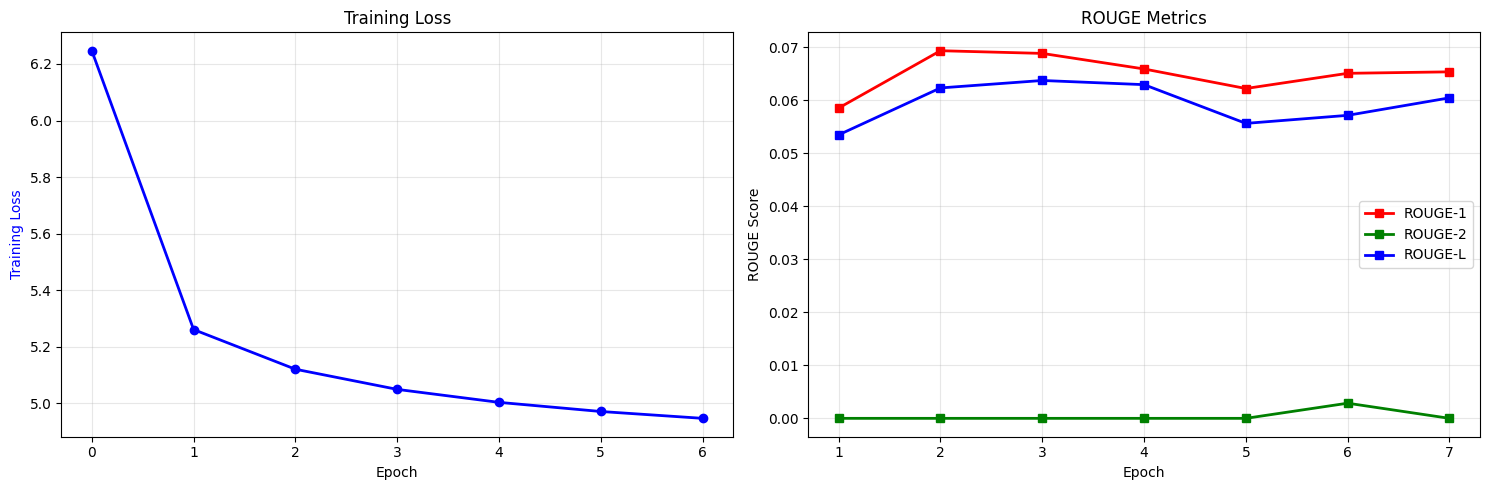

In [10]:
plot_training_history(train_losses, rouge_history)

# transformer

In [14]:
generator = pipeline(
    "text-generation", 
    model="distilgpt2",
    device=-1  # Используем CPU
)
result = generator("Раз, два, три, четыре, пять, ", max_length=20, do_sample=True, top_k=50)
print(result[0]["generated_text"])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Раз, два, три, четыре, пять, лькик, добяжерят исповереният онижих досстать вольшение.


Саводесят совольшение гуз лиесеря полесеря.


# evals

TRANSFORMER

In [17]:
calculate_rouge_transformer(generator=generator, rouge_loader=rouge_loader)


ПРИМЕРЫ АВТОДОПОЛНЕНИЙ (distilgpt2):

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: ista and my art dealer
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: or be sure to give him some time to
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: ya im gonna do that
Цель (1/4 текста): ##kesmooches and ollian hugs


{'rouge1': np.float64(0.039516039516039506),
 'rouge2': np.float64(0.0),
 'rougeL': np.float64(0.03981906981906981),
 'rougeLsum': np.float64(0.040041070041070034)}

LSTM

In [22]:
calculate_rouge_simple(model, rouge_loader, tokenizer, 0)


ПРИМЕРЫ АВТОДОПОЛНЕНИЙ:

--- Пример 1 ---
Вход (3/4 текста): i am a geek im cataloguing my books and scanning them by bar...
Сгенерировано: i am a geek im cataloguing my books and scanning them by bar now im in need of my life
Цель (1/4 текста): ##code into the puter

--- Пример 2 ---
Вход (3/4 текста): goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs...
Сгенерировано: goddamn that was fun now headin to doms to bbq and chill out after pickin up some grub at aampjs
Цель (1/4 текста): up amp blue label gonnabe a great day

--- Пример 3 ---
Вход (3/4 текста): marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nu...
Сгенерировано: marynukelover i woke up too early im gonna go back to sleep for an hour or two ill talk to ya later nuggie
Цель (1/4 текста): ##kesmooches and ollian hugs


{'rouge1': np.float64(0.06527742099170669),
 'rouge2': np.float64(0.004224270353302612),
 'rougeL': np.float64(0.06058183138322511),
 'rougeLsum': np.float64(0.06079847691345948)}

# Вывод

Результаты показывают, что для нашей конкретной задачи автодополнения дообученная LSTM-модель демонстрирует более высокие метрики ROUGE по сравнению с недообученной трансформерной моделью distilgpt2. Это подчеркивает важность специализации моделей под конкретную предметную область, даже если используются более простые архитектуры.